In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
sns.set_theme()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot as plt

C:\Users\derek\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df1 = pd.read_csv('df1.csv',index_col=0)
df2 = pd.read_csv('df2.csv',index_col=0)
df3 = pd.read_csv('df3.csv',index_col=0)
df4 = pd.read_csv('df4.csv',index_col=0)
df5 = pd.read_csv('df5.csv',index_col=0)
df6 = pd.read_csv('df6.csv',index_col=0)
df7 = pd.read_csv('df7.csv',index_col=0)
sets=[df1,df2,df3,df4,df5,df6,df7]

Random Forest: Accuracy=0.466
Random Forest: f1-score=0.458


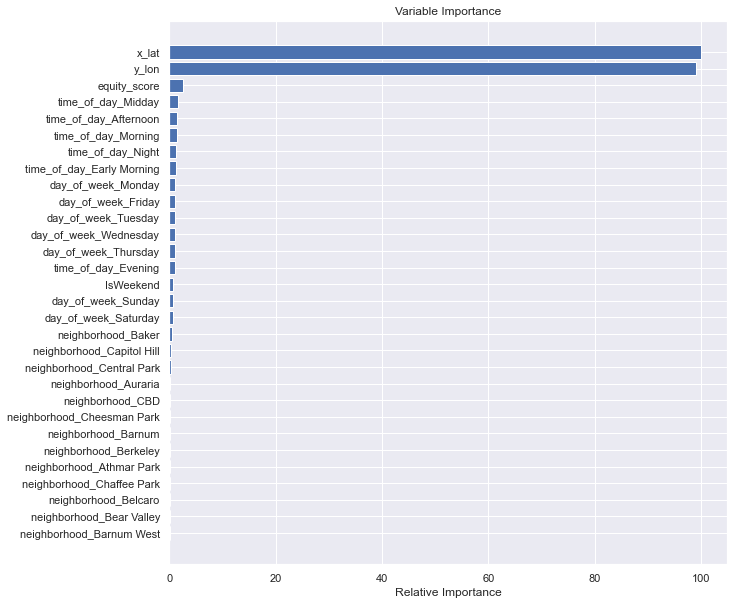

Random Forest: Accuracy=0.395
Random Forest: f1-score=0.331


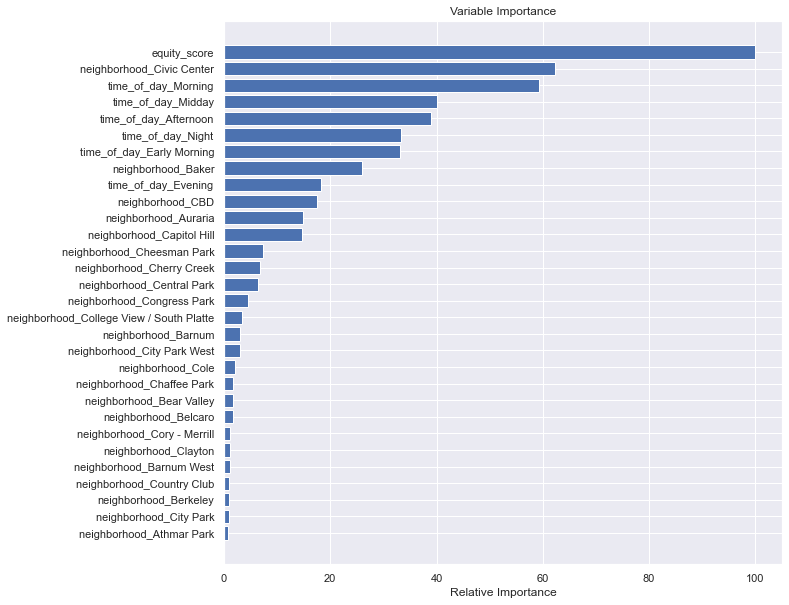

Random Forest: Accuracy=0.398
Random Forest: f1-score=0.337


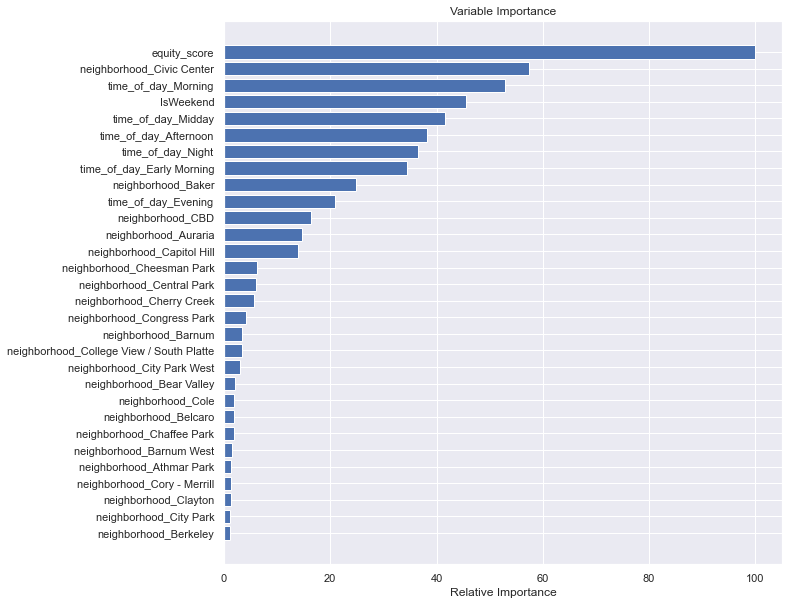

Random Forest: Accuracy=0.397
Random Forest: f1-score=0.339


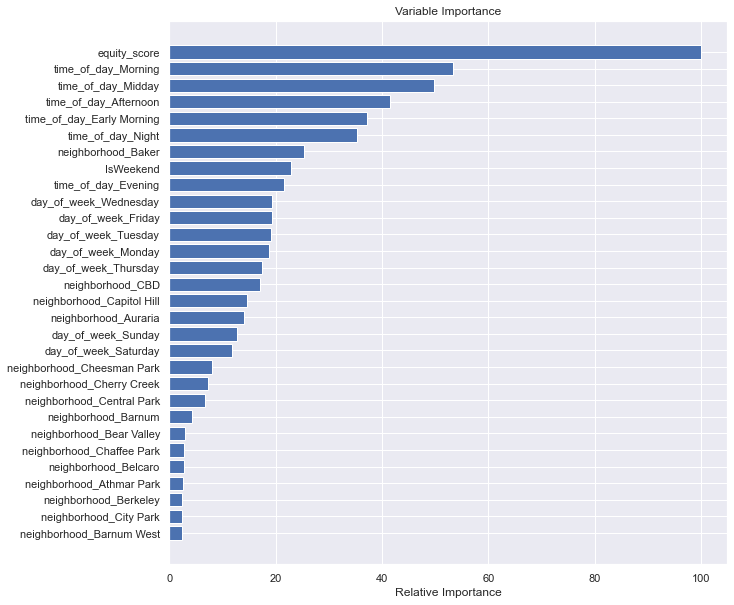

Random Forest: Accuracy=0.381
Random Forest: f1-score=0.299


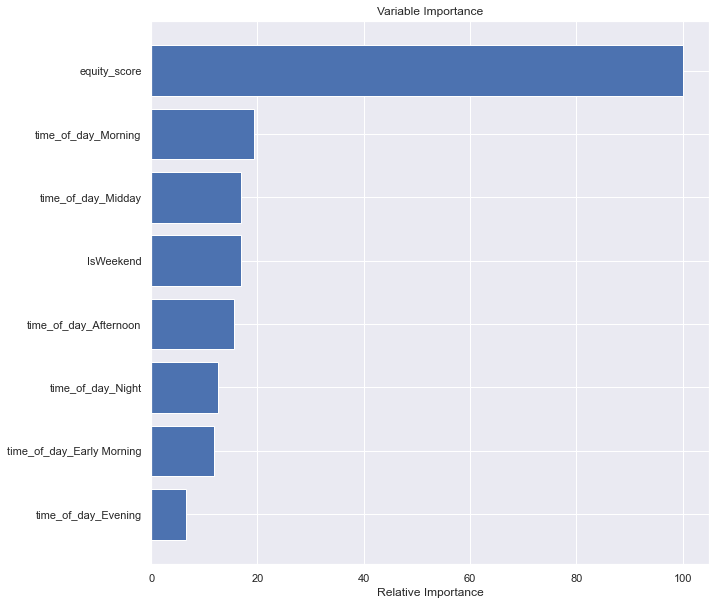

Random Forest: Accuracy=0.366
Random Forest: f1-score=0.242


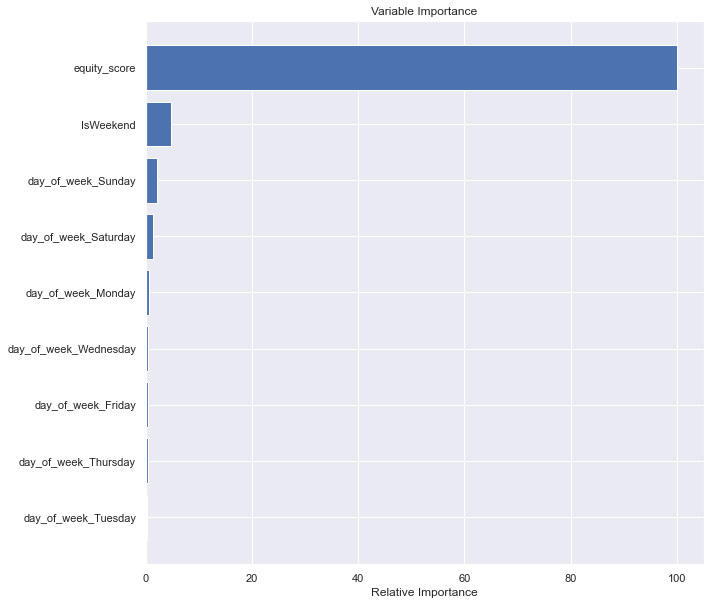

Random Forest: Accuracy=0.383
Random Forest: f1-score=0.294


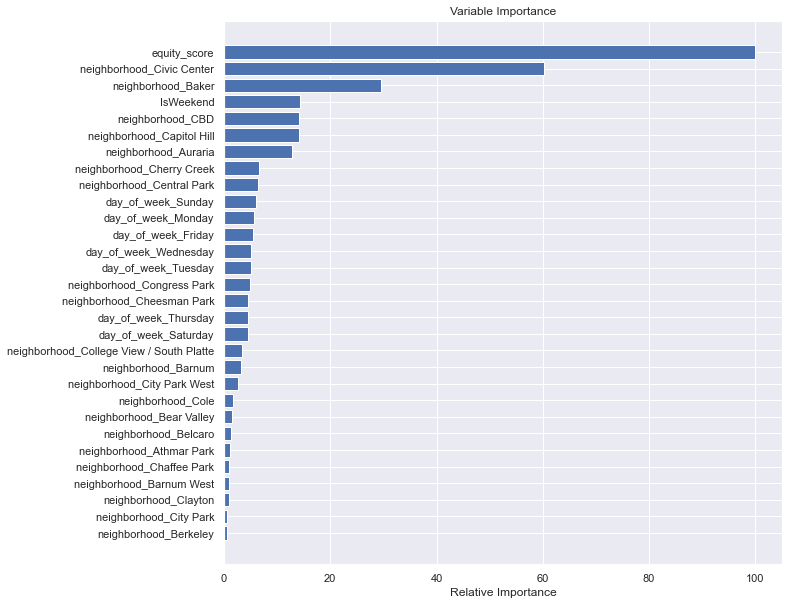

In [4]:
for df in sets:
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = RandomForestClassifier(n_estimators=25, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train_scaled, y_train)
    y_pred = model_res.predict(X_test_scaled)
    y_pred_prob = model_res.predict_proba(X_test_scaled)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print('Random Forest: Accuracy=%.3f' % (ac))
    print('Random Forest: f1-score=%.3f' % (f1))
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]
    pos = np.arange(sorted_idx.shape[0]) + .5
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363346


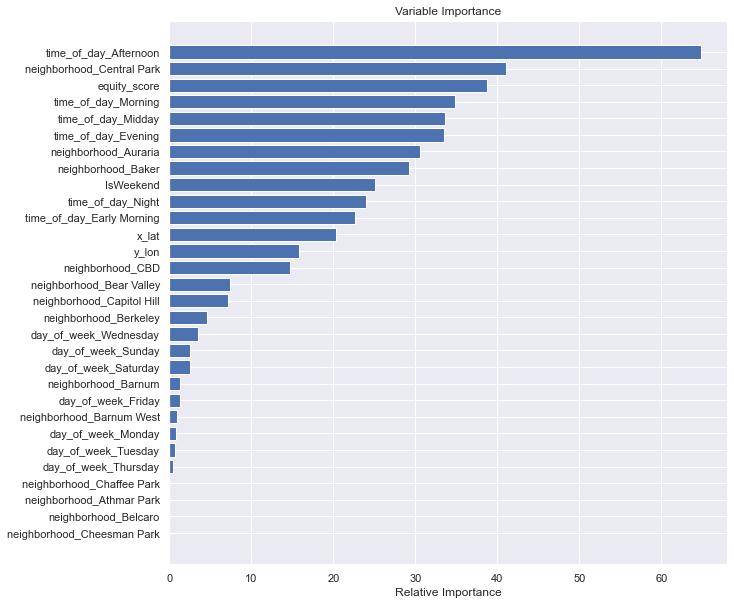

C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


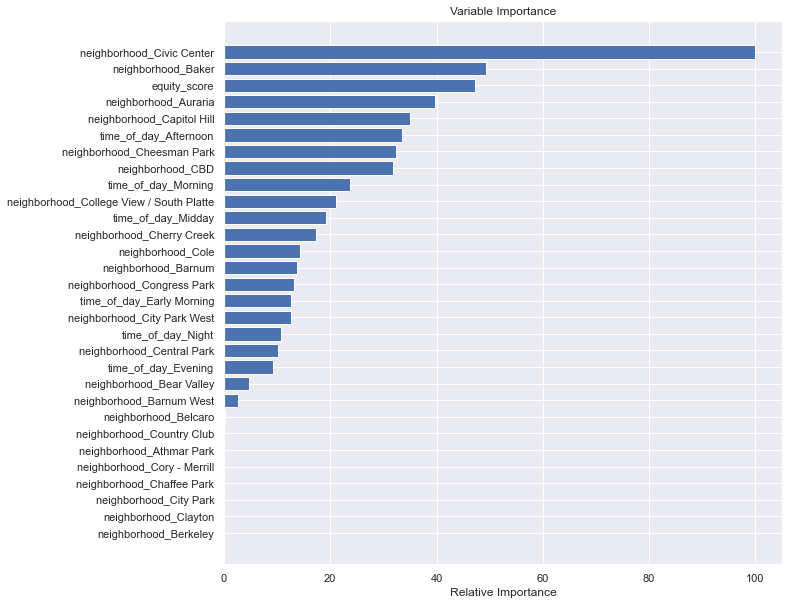

C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


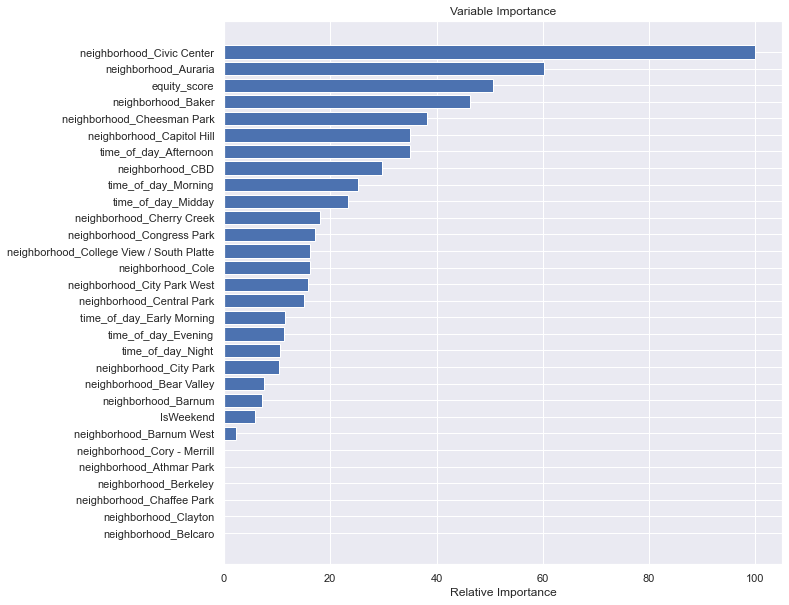

C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


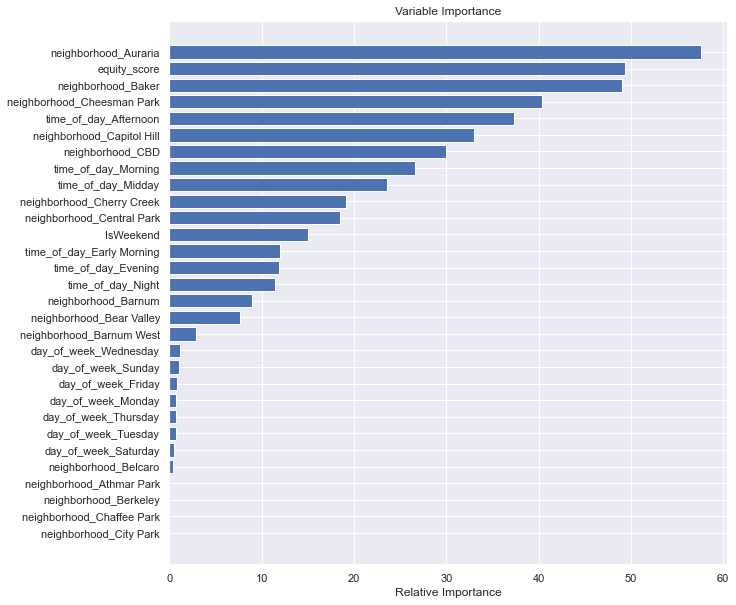

C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.362359


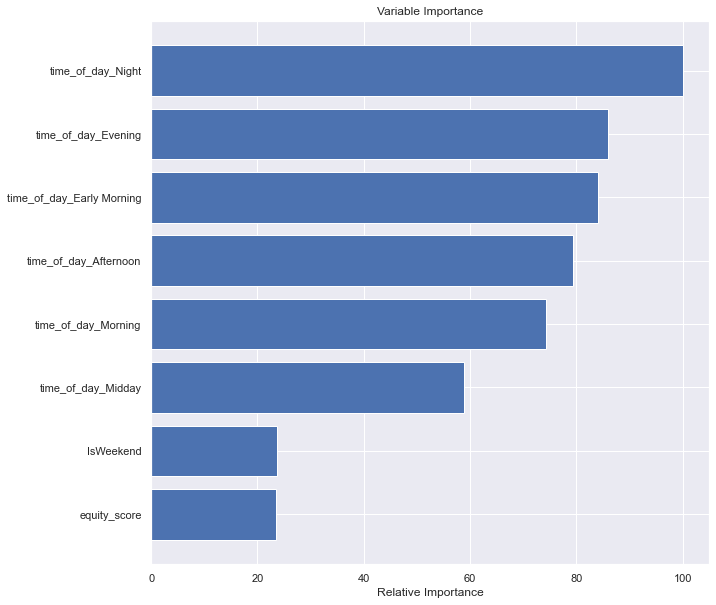

C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


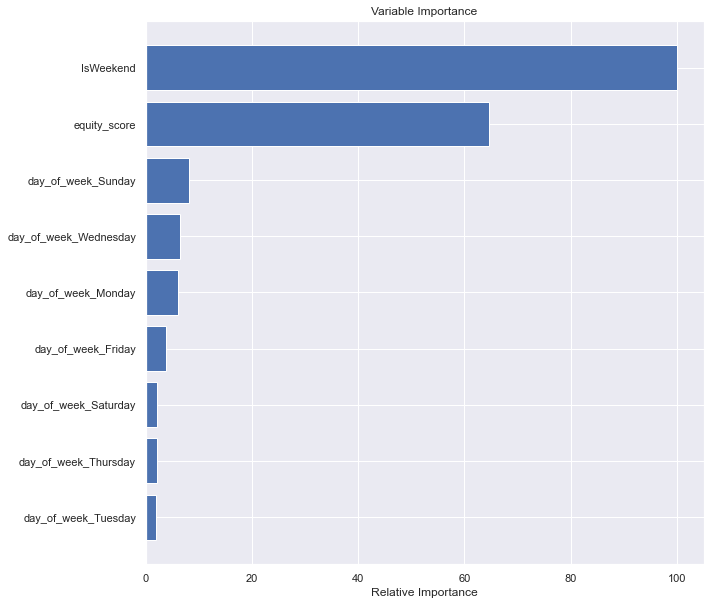

C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


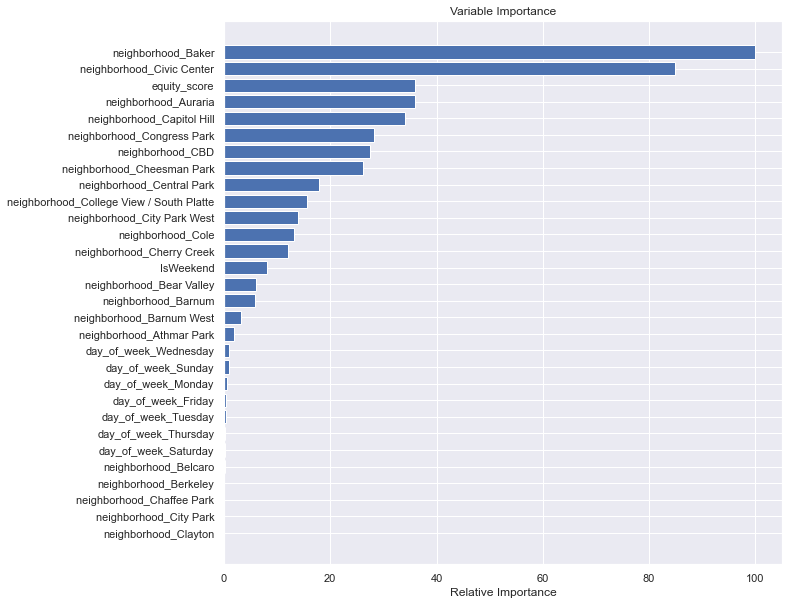

In [5]:
for df in sets:
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)
    xg_cl.fit(X_train_scaled,y_train)
    preds = xg_cl.predict(X_test)
    accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
    feature_importance = xg_cl.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]
    pos = np.arange(sorted_idx.shape[0]) + .5
    sorted_idx.size  
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [6]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for df in sets:
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    for learning_rate in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(X_train_scaled, y_train)
        print("Learning rate: ", learning_rate)
        print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scaled, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_scaled, y_test)))
        print()

Learning rate:  0.05
Accuracy score (training): 0.364
Accuracy score (validation): 0.363

Learning rate:  0.1
Accuracy score (training): 0.364
Accuracy score (validation): 0.363

Learning rate:  0.25
Accuracy score (training): 0.366
Accuracy score (validation): 0.365

Learning rate:  0.5
Accuracy score (training): 0.376
Accuracy score (validation): 0.374

Learning rate:  0.75
Accuracy score (training): 0.383
Accuracy score (validation): 0.381

Learning rate:  1
Accuracy score (training): 0.384
Accuracy score (validation): 0.382

Learning rate:  0.05
Accuracy score (training): 0.364
Accuracy score (validation): 0.363

Learning rate:  0.1
Accuracy score (training): 0.364
Accuracy score (validation): 0.363

Learning rate:  0.25
Accuracy score (training): 0.365
Accuracy score (validation): 0.364

Learning rate:  0.5
Accuracy score (training): 0.374
Accuracy score (validation): 0.373

Learning rate:  0.75
Accuracy score (training): 0.375
Accuracy score (validation): 0.374

Learning rate:  1

In [8]:
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

for df in sets:
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = AdaBoostClassifier(n_estimators=10)
    clf.fit(X_train_scaled, y_train)
    clf.predict(y_test.reshape(-1, 1))
    preds = clf.predict(X_test_scaled)
    accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
    # feature_importance = clf.feature_importances_
    # # make importances relative to max importance
    # feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    # sorted_idx = np.argsort(feature_importance)[:30]
    # pos = np.arange(sorted_idx.shape[0]) + .5
    # sorted_idx.size  
    # plt.figure(figsize=(10,10))
    # plt.barh(pos, feature_importance[sorted_idx], align='center')
    # plt.yticks(pos, X.columns[sorted_idx])
    # plt.xlabel('Relative Importance')
    # plt.title('Variable Importance')
    # plt.show()


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
from sklearn import svm
dont run
for df in sets:
    y = df.iloc[:,0] 
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = svm.SVC()
    clf.fit(X_train_scaled, y_train)
    clf.predict(y_test)
    preds = clf.predict(X_test_scaled)
    accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
    # feature_importance = clf.feature_importances_
    # # make importances relative to max importance
    # feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    # sorted_idx = np.argsort(feature_importance)[:30]
    # pos = np.arange(sorted_idx.shape[0]) + .5
    # sorted_idx.size  
    # plt.figure(figsize=(10,10))
    # plt.barh(pos, feature_importance[sorted_idx], align='center')
    # plt.yticks(pos, X.columns[sorted_idx])
    # plt.xlabel('Relative Importance')
    # plt.title('Variable Importance') 
    # plt.show()